In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

In [29]:
df = pd.read_csv('perrin-freres-monthly-champagne.csv', index_col='Month', skipfooter=2, parse_dates=True)
df.columns = ['Sales']
df.index.freq = 'MS'
df

/tmp/ipykernel_16962/2349608651.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('perrin-freres-monthly-champagne.csv', index_col='Month', skipfooter=2, parse_dates=True)


,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


In [30]:
df['LogSales'] = np.log(df['Sales'])

In [31]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [32]:
import pmdarima as pm


In [33]:
model = pm.auto_arima(train['Sales'],
                    trace=True,
                    suppress_warnings=True,
                    seasonal=True,
                    m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1320.438, Time=1.47 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1315.739, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1313.732, Time=0.29 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1314.620, Time=0.30 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1325.791, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1315.489, Time=0.05 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1314.184, Time=0.28 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=1314.675, Time=0.72 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1314.718, Time=0.11 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=1315.563, Time=0.88 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1315.716, Time=0.21 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1315.762, Time=0.34 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=1315.796, Time=0.37 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1313.652, Time=0.42 sec
 ARIMA(0,0,1)(0,1,0

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   93
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 12)   Log Likelihood                -652.826
Date:                             Tue, 21 Mar 2023   AIC                           1313.652
Time:                                     13:33:10   BIC                           1323.230
Sample:                                 01-01-1964   HQIC                          1317.495
                                      - 09-01-1971                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    408.7005    114.298      3.576      0.000     184.681     632.720
ma.L1          0.2176      0.080      2.722      0.006       0.061       0.374
ar.S.L12      -0.1969      0.090     -2.192      0.028      -0.373      -0.021
sigma2      5.616e+05   6.97e+04      8.058      0.000    4.25e+05    6.98e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                 5.40
Prob(Q):                              0.52   Prob(JB):                         0.07
Heteroskedasticity (H):               2.22   Skew:                            -0.23
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

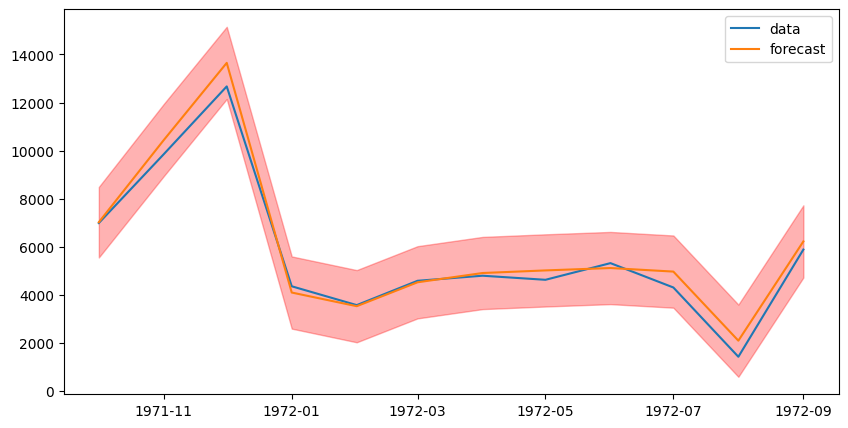

In [36]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(test.index, test['Sales'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between( test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)

ax.legend()

ValueError: x and y must have same first dimension, but have shapes (93,) and (81,)

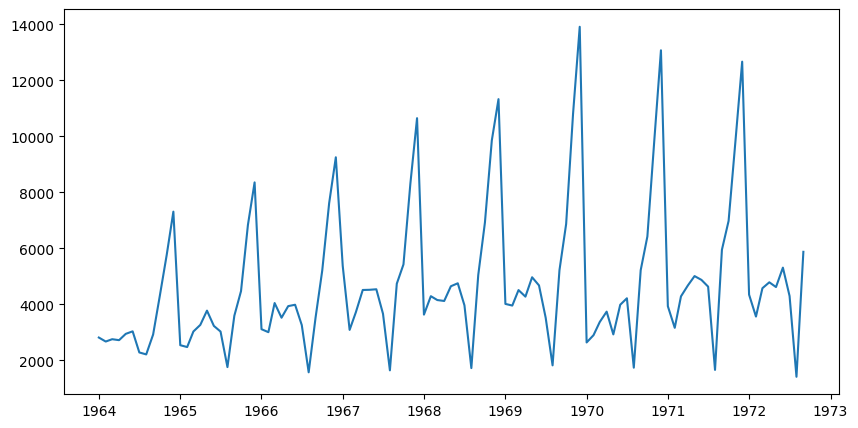

In [37]:
train_pred = model.predict_in_sample(start=12, end=-1)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index, df['Sales'], label='data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)

ax.legend()

In [ ]:
### forecast RMSE
def rmse(t, y):
    return np.sqrt(np.mean((t-y)**2))

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-50.546, Time=1.56 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-41.975, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-54.968, Time=0.23 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-53.384, Time=0.29 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-34.700, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-44.102, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-52.971, Time=0.66 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=-52.991, Time=0.45 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-55.117, Time=0.36 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=-53.123, Time=0.52 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=1.54 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-50.817, Time=0.25 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=-56.122, Time=0.30 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=-44.178, Time=0.09 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   

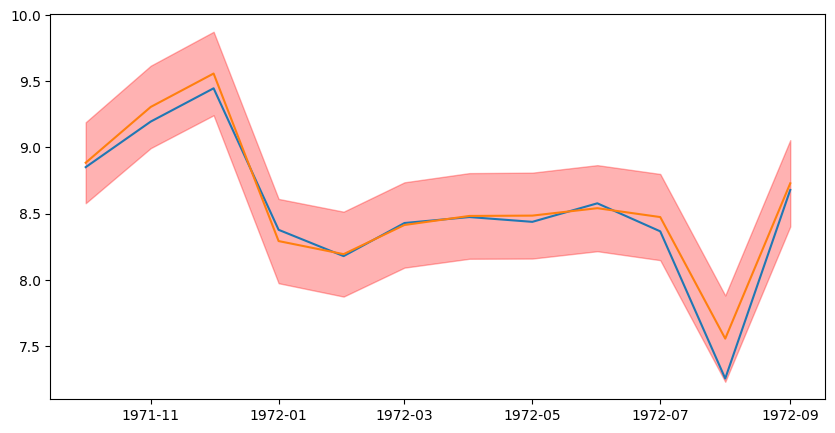

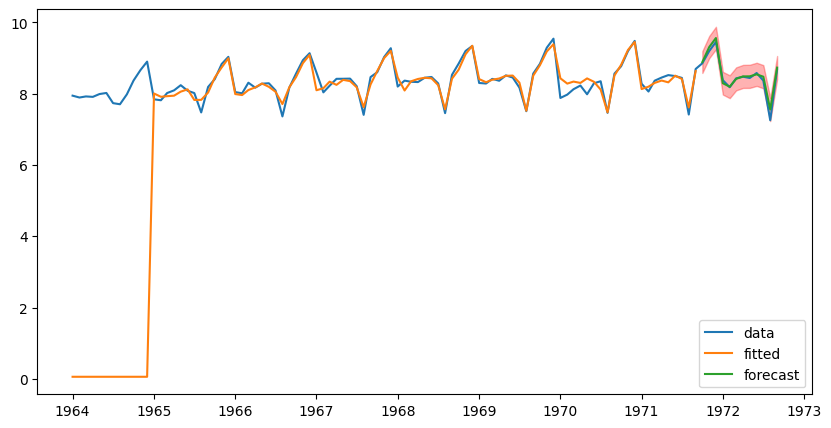

In [ ]:
model = pm.auto_arima(train['LogSales'],
                    trace=True,
                    suppress_warnings=True,
                    seasonal=True,
                    m=12)

model.summary()

test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(test.index, test['LogSales'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between( test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)


train_pred = model.predict_in_sample(start=12, end=-1)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index, df['LogSales'], label='data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)

ax.legend()



In [ ]:
print(f"Non-logged RMSE: {rmse(test['Sales'], np.exp(test_pred))}")
print(f"Logged RMSE: {rmse(test['LogSales'], np.exp(test_pred))}")

Non-logged RMSE: 6358.294641538409
Logged RMSE: 0.10887350744692141
